<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/manczak/Zajecia_Regresje_Rozne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

In [35]:
# load data

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [36]:
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())

y = housing.target

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [37]:
model_lin = LinearRegression()

In [38]:
# Ustawienia dla walidacji krzyżowej:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

In [39]:
# Obliczanie błędu średniokwadratowego (MSE) za pomocą walidacji krzyżowej
blad_sredniokwadratowy = cross_val_score(model_lin, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


In [40]:
print(blad_sredniokwadratowy)

[-0.52914023 -0.5126393  -0.53908745 -0.50610094 -0.55096393 -0.49700305
 -0.56833422 -0.56140077 -0.51132183 -0.50406523 -0.53994357 -0.52115031
 -0.51721993 -0.52555722 -0.53347797 -0.53820188 -0.52000447 -0.53552124
 -0.51464969 -0.54476779 -0.53313041 -1.31524248 -0.50321081 -0.52702671
 -0.5553761 ]


In [41]:
# Średnia dla błędu średniokwadratowego
srednia_bledu = np.mean(blad_sredniokwadratowy)

# Odchylenie dla bledu sredniokwadratowego
odchylenie_bledu = np.std(blad_sredniokwadratowy)

srednia_bledu, odchylenie_bledu

(-0.5601815004331749, 0.1552028132663088)

#Wyniki dla regresji liniowej:

#(-0.5280350153126617, 0.025537936338042883)


In [42]:
# Przygotowanie transformacji wielomianowej 2. stopnia
poly_transform = PolynomialFeatures(degree=2, include_bias=False)

# Tworzenie pipeline'a, który najpierw przekształci cechy do postaci wielomianowej,
# a następnie zastosuje regresję liniową
model_poly2 = Pipeline([
    ('poly', poly_transform),
    ('linear', LinearRegression())
])

# Ustawienia walidacji krzyżowej, takie same jak ostatnio
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# Obliczanie negatywnego MSE za pomocą walidacji krzyżowej
blad_sredniokwadratowy2 = cross_val_score(model_poly2, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Średni i odchylenie standardowe negatywnego MSE
srednia_bledu2 = np.mean(blad_sredniokwadratowy2)
odchylenie_bledu2 = np.std(blad_sredniokwadratowy2)

srednia_bledu2, odchylenie_bledu2

(-14.475686435425905, 42.680399544226866)

# Wyniki dla wielowymiarowej 2 stopnia
# (-2.246261005282666, 6.09434581244046)

In [43]:
# Przygotowanie transformacji wielomianowej 3. stopnia
poly_transform = PolynomialFeatures(degree=3, include_bias=False)

# Tworzenie pipeline'a, który najpierw przekształci cechy do postaci wielomianowej,
# a następnie zastosuje regresję liniową
model_poly3 = Pipeline([
    ('poly', poly_transform),
    ('linear', LinearRegression())
])

# Ustawienia walidacji krzyżowej, takie same jak ostatnio
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# Obliczanie negatywnego MSE za pomocą walidacji krzyżowej
blad_sredniokwadratowy3 = cross_val_score(model_poly3, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Średni i odchylenie standardowe negatywnego MSE
srednia_bledu3 = np.mean(blad_sredniokwadratowy3)
odchylenie_bledu3 = np.std(blad_sredniokwadratowy3)

srednia_bledu3, odchylenie_bledu3

(-650513.4586397528, 2109756.4037612295)

# 3 Stopnia
# (-64509.584848895305, 191734.36245621508)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

# Inicjalizacja modelu k-NN z określoną liczbą sąsiadów, np. k=5
model_knn = KNeighborsRegressor(n_neighbors=5)

# Ustawienia walidacji krzyżowej, takie same jak ostatnio
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# Obliczanie negatywnego MSE za pomocą walidacji krzyżowej
blad_sredniokwadratowy_knn = cross_val_score(model_knn, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Średni i odchylenie standardowe negatywnego MSE
srednia_bledu_knn = np.mean(blad_sredniokwadratowy_knn)
odchylenie_bledu_knn = np.std(blad_sredniokwadratowy_knn)

srednia_bledu_knn, odchylenie_bledu_knn


(-1.1276646043758873, 0.025867448153570515)

Taki wynik dla knn:
# (-1.1077443132493996, 0.032400978501796886)

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa15093b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa15093bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa15093b550>,
 'medians': [<matplotlib.lines.Line2D at 0x7aa15090c280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7aa15090c850>,
 'means': [<matplotlib.lines.Line2D at 0x7aa15090c610>,
  <matplotlib.lines.Line2D at 0x7aa150b74490>]}

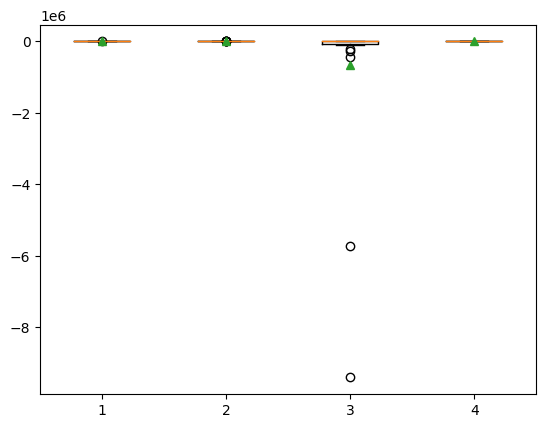

In [45]:
pyplot.boxplot([blad_sredniokwadratowy, blad_sredniokwadratowy2, blad_sredniokwadratowy3, blad_sredniokwadratowy_knn], showmeans = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa150c081c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa150c08700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa150bd3ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7aa150c08c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7aa150c09180>,
 'means': [<matplotlib.lines.Line2D at 0x7aa150c08ee0>,
  <matplotlib.lines.Line2D at 0x7aa150c0a3e0>]}

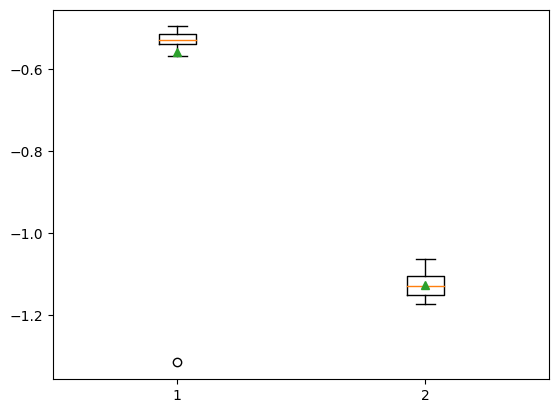

In [46]:
# trójka bardzo odstaje
pyplot.boxplot([blad_sredniokwadratowy,  blad_sredniokwadratowy_knn], showmeans = True)

[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333]
Mean MAE: -0.532


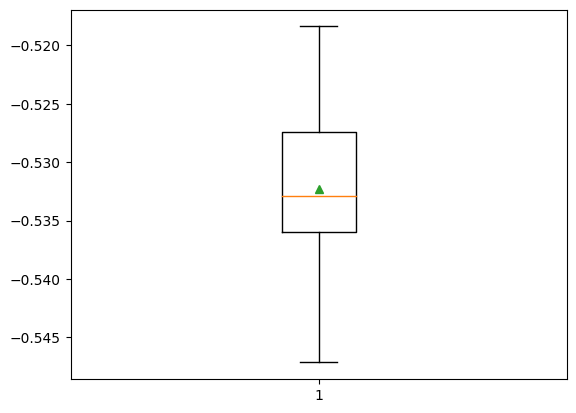

In [47]:
# To pani pokazała na końcu zajęć i dało to bardzo dobre wyniki
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
model = TransformedTargetRegressor(regressor = LinearRegression())

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

scores_tv = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs=-1)

scores = absolute(scores_tv)

s_mean = mean(scores_tv)
print (scores_tv)
print('Mean MAE: %.3f' % (s_mean))

pyplot.boxplot(scores_tv, showmeans=True)
pyplot.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa1509de470>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa1509dea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa1509de1d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7aa1509df070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7aa1509df580>,
 'means': [<matplotlib.lines.Line2D at 0x7aa1509df280>,
  <matplotlib.lines.Line2D at 0x7aa150974340>]}

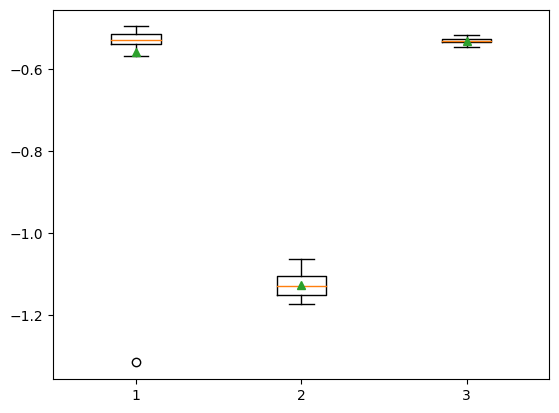

In [48]:
# sprawdzimy z innymi:
pyplot.boxplot([blad_sredniokwadratowy,  blad_sredniokwadratowy_knn, scores_tv], showmeans = True)
# pyplot.boxplot([blad_sredniokwadratowy, blad_sredniokwadratowy2,  blad_sredniokwadratowy_knn, scores_tv], showmeans = True)